# Исследование данных о продаже компьютерных игр

Перед нами данные о продаже видеоигр в интернет-магазине «Стримчик». Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Наша задача выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют в отрасли продажи видеоигр.

**План:**

1. [Изучить общую информацию о полученном датафрейме.](#section_id_1)
2. [Подготовить данные.](#section_id_2)</br>
* 2.1. Заменить названия столбцов.</br>
* 2.2. Преобразовать данные в нужные типы. </br>  
* 2.3. Обработать пропуски.</br>
* 2.4. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.</br>
* 2.5. Определить есть ли в данных дубликаты.</br>
3. [Провести исследовательский анализ данных.](#section_id_3)</br>
* 3.1.. Посмотреть сколько игр выпускалось в разные годы и ответить на вопрос - важны ли данные за все периоды?</br>
* 3.2. Посмотреть как менялись продажи по платформам.Ответить на вопрос - за какой характерный срок появляются новые и исчезают старые платформы?</br>
* 3.3. Выбрать данные, которые соответствуют соответствующиму актуальному периоду.</br>
* 3.4. Определить какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.</br>
* 3.5. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.</br>
* 3.6. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Соотнести выводы с продажами игр на других платформах.</br>
* 3.7. Посмотреть на общее распределение игр по жанрам.</br>
4. [Составить портрет пользователя каждого региона. Самые популярные платформы (топ-5). Описать различия в долях продаж. Самые популярные жанры (топ-5). Пояснить разницу. Ответить на вопрос - влияет ли рейтинг ESRB на продажи в отдельном регионе.](#section_id_4)</br>
* 4.1. Составить портрет пользователя Северной Америки.</br>
* 4.2. Составить портрет пользователя Европы.</br>
* 4.3. Составить портрет пользователя Японии.</br>
5. [Проверить гипотезы.](#section_id_5)</br>
* 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;</br>
* 5.2. Средние пользовательские рейтинги жанров Action и Sports разные.</br>
6. [Написать общий вывод.](#section_id_6)

**Описание данных:**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

## 1. Загрузка данных и изучение общей информации.<a id='section_id_1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('games.csv')
print(f'Размер таблицы: {data.shape}')
data.head()

Размер таблицы: (16715, 11)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2. Подготовка данных.<a id='section_id_2'></a>

### 2.1. Замена названий столбцов.

In [3]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2. Преобразование данных в необходимые типы.

Выведем общую информацию о таблице.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим тип данных года выпуска на целочисленный. Аббревеатура 'tbd' в столбце 'оценка пользователей' вероятнее всего означает 'to be determined', что означает 'будет определено', поэтому её заменяем на 'NaN'.

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float') 

### 2.3. Обработка пропусков.

Посчитаем количество пропусков во всём датафрейме.

In [6]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


Большинство пропусков скопилось в трёх последних категориях данных: оценка критиков, оценка пользователей и рейтинг от организации ESRB. Так же есть несколько пропусков в названиях игр, жанре и в категории год выпуска. Пропуски в рейтинге заменим на 'Unknown'. Остальные пропуски заполнить затруднительно, поэтому оставим их как есть.

In [7]:
data['rating'] = data['rating'].fillna('Unknown')
data['rating'].isna().sum()

0

### 2.4. Подсчет суммарных продаж.

In [8]:
data['total_sale'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### 2.5. Проверка на дубликаты.

In [9]:
data.duplicated().sum()

0

In [10]:
data[data.duplicated(subset=['name','platform', 'year_of_release', 'genre'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,Unknown,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,Unknown,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


Сложно понять являются ли данные строчки дубликатами, если они имеют разные продажи и оценки. Тем не менее их совсем мало, они не должны повлиять на анализ.

## 3. Исследовательский анализ данных.<a id='section_id_3'></a>

### 3.1. Посмотрим, сколько игр выпускалось в разные года.

In [11]:
len(data['year_of_release'].unique())

38

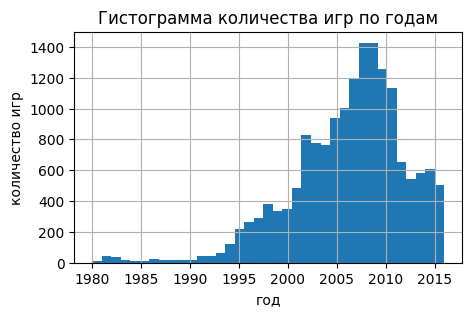

In [12]:
plt.figure(figsize=(5, 3))
ax = data['year_of_release'].hist(bins=37)
ax.set_title('Гистограмма количества игр по годам')
ax.set_xlabel('год')
ax.set_ylabel('количество игр');

По гистограмме видно, что игр, выпущенных в 1980-1995 года довольно мало по сравнению с выпущенными позднее, поэтому период с 1995 года по 2016 является более полезным для анализа.

In [13]:
data = data.query('year_of_release > 1994')

### 3.2. Посмотрим, как менялись продажи по платформам.

In [14]:
len(data['platform'].unique())

26

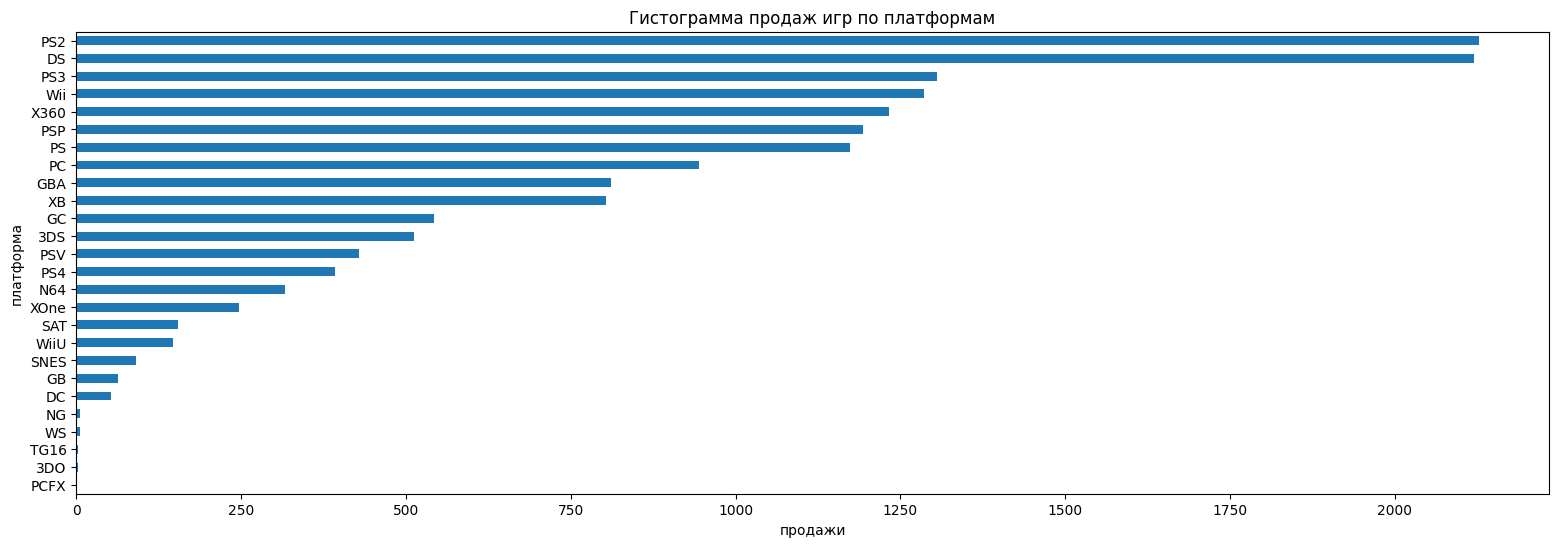

In [15]:
ax = data.groupby('platform')['total_sale'].count().sort_values().plot(kind = 'barh', figsize = (19,6))
ax.set_title('Гистограмма продаж игр по платформам')
ax.set_ylabel('платформа')
ax.set_xlabel('продажи');

Наиболее популярными платформами являются: PS2, DS, PS3, Wii, X360, PSP. Их продажи достигают 800-2100 млн. копий. Разобьём платформы попарно и построим распределения по годам для этих платформ.

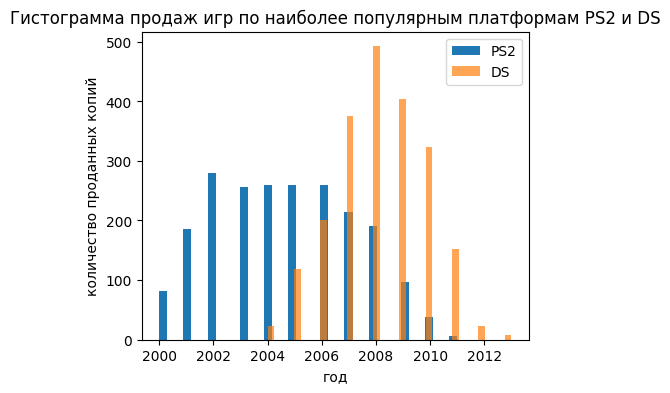

In [16]:
fig, ax = plt.subplots(figsize = (5,4))
ax = data[data['platform'] == 'PS2']['year_of_release'].plot(kind='hist', bins=37, y='total_sale')
ax.set_title('Гистограмма продаж игр по наиболее популярным платформам PS2 и DS')
data[data['platform'] == 'DS']['year_of_release'].plot(kind='hist', bins=37, ax=ax, alpha =0.7, y='total_sale')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий')
ax.legend(['PS2', 'DS']);

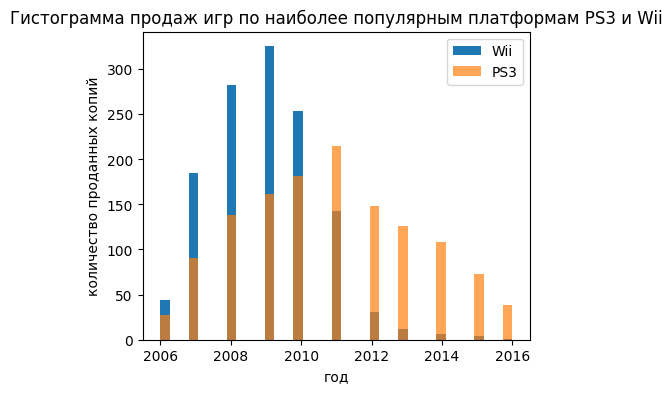

In [17]:
fig, ax = plt.subplots(figsize = (5,4))
ax = data[data['platform'] == 'Wii']['year_of_release'].plot(kind='hist', bins=37, y='total_sale')
ax.set_title('Гистограмма продаж игр по наиболее популярным платформам PS3 и Wii')
data[data['platform'] == 'PS3']['year_of_release'].plot(kind='hist', bins=37, ax=ax, alpha =0.7, y='total_sale')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий')
ax.legend(['Wii', 'PS3']);

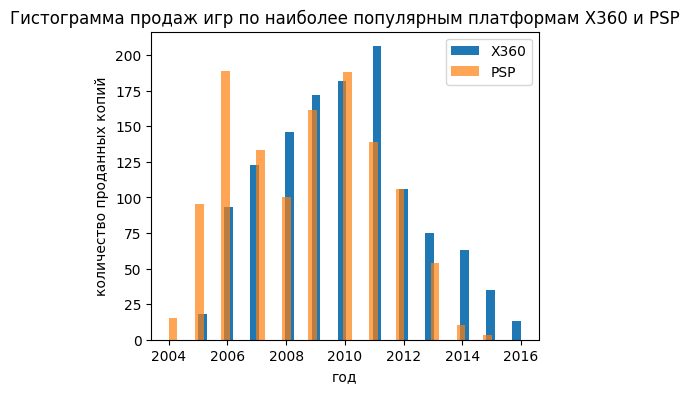

In [18]:
fig, ax = plt.subplots(figsize = (5,4))
ax = data[data['platform'] == 'X360']['year_of_release'].plot(kind='hist', bins=37, y='total_sale')
ax.set_title('Гистограмма продаж игр по наиболее популярным платформам X360 и PSP')
data[data['platform'] == 'PSP']['year_of_release'].plot(kind='hist', bins=37, ax=ax, alpha =0.7, y='total_sale')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий')
ax.legend(['X360', 'PSP']);

Каждый график грубо описывает нормальное распределение. Можно сказать, что новые платформы набирают обороты примерно за 3-5 лет. Платформы теряют свою популярность примерно через 5 лет после пика. То есть жизненный цикл платформ около 10 лет.

### 3.3. Возьмём данные за соответствующий актуальный период..

В пункте 3.1. мы определили актуальный период как 1995-2016, однако по графикам можно сказать, что наиболее популярные платформы начали выпускать свои игры с 2000 года. Возьмём актуальный период как 2000-2016 года.

In [19]:
data = data.query('year_of_release > 1999')

### 3.4. Определим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

Для того, чтобы составить прогноз на 2017 год, нам не нужен такой большой период как 2000-2016 года, необходим небольшой промежуток времени, на котором можно было бы понять поведение платформ за последние несколько лет. Как было определено ранее, платформы набирают обороты в течение 3-5 лет и становятся менее популярными через примерно 5 лет после пика. Четырёх лет будет достаточно, чтобы понять насколько будут популярными платформы к 2016-му году. Для этого снова изменим актуальный период на 2013-2016.

In [20]:
data = data.query('year_of_release > 2012')
data.shape

(2233, 12)

Создадим таблицу, состоящую из платформ, годов выпуска и суммарных продаж.

In [21]:
table = pd.DataFrame(data = data.loc[:, ['platform', 'year_of_release', 'total_sale']], 
                     columns = ['platform', 'year_of_release', 'total_sale'])
table.head()

,platform,year_of_release,total_sale
16,PS3,2013,21.05
23,X360,2013,16.27
31,PS4,2015,14.63
33,3DS,2013,14.60
42,PS4,2014,12.62


Построим графики распределения для каждой платформы по годам. Так как платформы выпускались в разные года и не все из них затронули 2013 год, то построим каждый график отдельно, чтобы указать для каждого своё количество корзин.

In [22]:
table['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

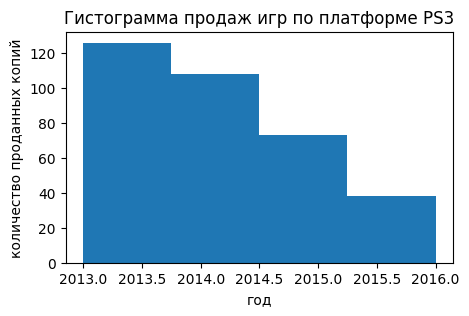

In [23]:
fig, ax = plt.subplots(figsize = (5,3))
ax = table[table['platform'] == 'PS3']['year_of_release'].plot(kind='hist', bins=4, y='total_sale')
ax.set_title('Гистограмма продаж игр по платформе PS3')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий');

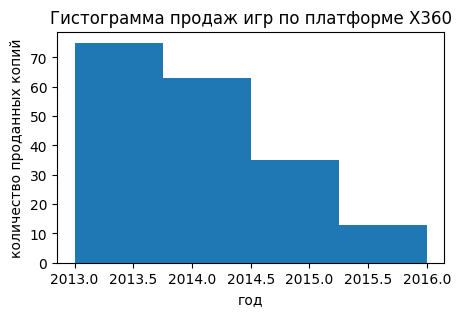

In [24]:
fig, ax = plt.subplots(figsize = (5,3))
ax = table[table['platform'] == 'X360']['year_of_release'].plot(kind='hist', bins=4, y='total_sale')
ax.set_title('Гистограмма продаж игр по платформе X360')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий');

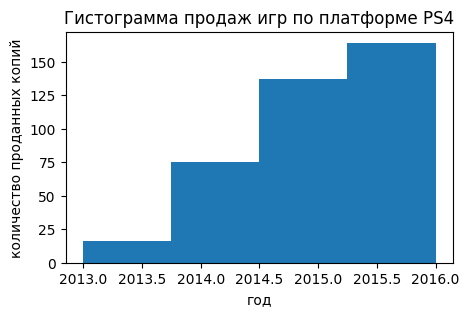

In [25]:
fig, ax = plt.subplots(figsize = (5,3))
ax = table[table['platform'] == 'PS4']['year_of_release'].plot(kind='hist', bins=4, y='total_sale')
ax.set_title('Гистограмма продаж игр по платформе PS4')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий');

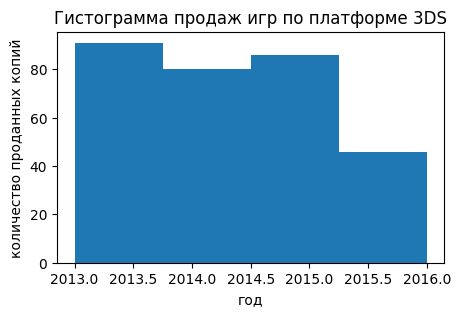

In [26]:
fig, ax = plt.subplots(figsize = (5,3))
ax = table[table['platform'] == '3DS']['year_of_release'].plot(kind='hist', bins=4, y='total_sale')
ax.set_title('Гистограмма продаж игр по платформе 3DS')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий');

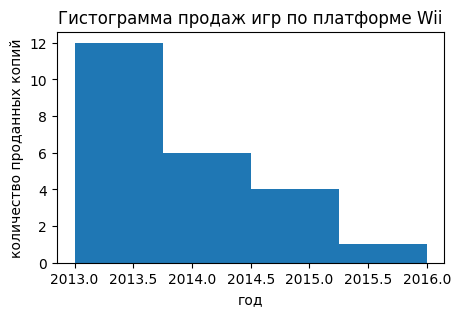

In [27]:
fig, ax = plt.subplots(figsize = (5,3))
ax = table[table['platform'] == 'Wii']['year_of_release'].plot(kind='hist', bins=4, y='total_sale')
ax.set_title('Гистограмма продаж игр по платформе Wii')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий');

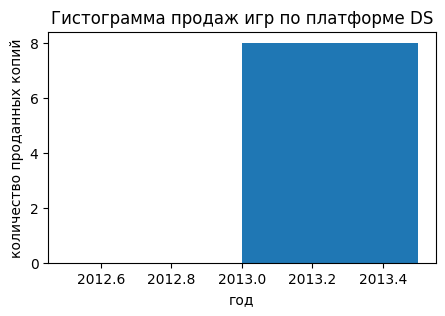

In [28]:
fig, ax = plt.subplots(figsize = (5,3))
ax = table[table['platform'] == 'DS']['year_of_release'].plot(kind='hist', bins=2, y='total_sale')
ax.set_title('Гистограмма продаж игр по платформе DS')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий');

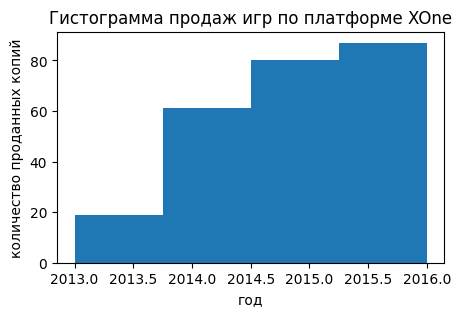

In [29]:
fig, ax = plt.subplots(figsize = (5,3))
ax = table[table['platform'] == 'XOne']['year_of_release'].plot(kind='hist', bins=4, y='total_sale')
ax.set_title('Гистограмма продаж игр по платформе XOne')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий');

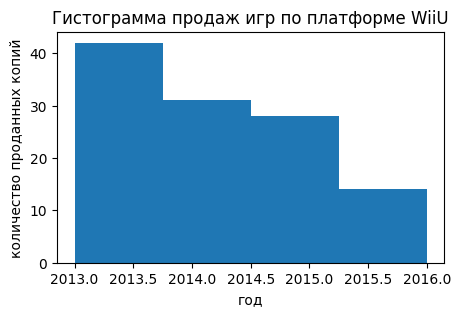

In [30]:
fig, ax = plt.subplots(figsize = (5,3))
ax = table[table['platform'] == 'WiiU']['year_of_release'].plot(kind='hist', bins=4, y='total_sale')
ax.set_title('Гистограмма продаж игр по платформе WiiU')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий');

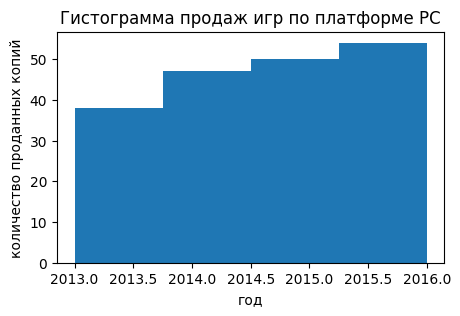

In [31]:
fig, ax = plt.subplots(figsize = (5,3))
ax = table[table['platform'] == 'PC']['year_of_release'].plot(kind='hist', bins=4, y='total_sale')
ax.set_title('Гистограмма продаж игр по платформе PC')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий');

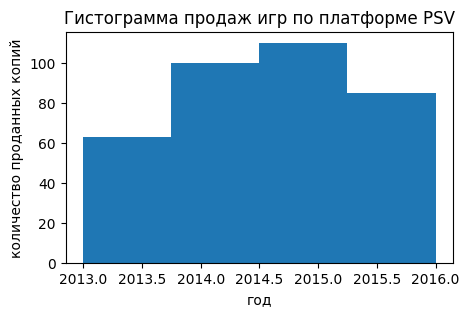

In [32]:
fig, ax = plt.subplots(figsize = (5,3))
ax = table[table['platform'] == 'PSV']['year_of_release'].plot(kind='hist', bins=4, y='total_sale')
ax.set_title('Гистограмма продаж игр по платформе PSV')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий');

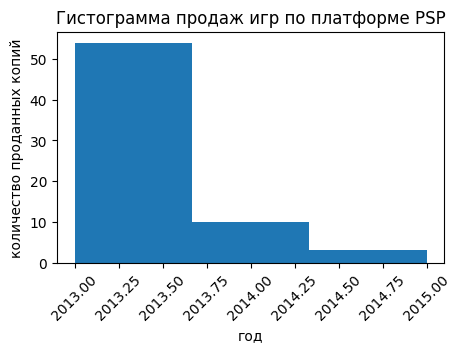

In [33]:
fig, ax = plt.subplots(figsize = (5,3))
ax = table[table['platform'] == 'PSP']['year_of_release'].plot(kind='hist', bins=3, y='total_sale')
ax.set_title('Гистограмма продаж игр по платформе PSP')
ax.set_xlabel('год')
ax.set_ylabel('количество проданных копий')
plt.xticks(rotation = 45);

* Платформа **PS3** теряет свою популярность к 2016 году, поэтому её вряд ли можно назвать прибыльной.

* Платформа **X360** хоть и успела продать много игр, но к 2016 году испытала сильный спад. Вероятнее всего она не принесёт большой прибыли в 2017 году.

* Платформа **PS4** начала продаваться в 2013 году, поэтому для неё подошло разбиение по 4 корзинам. По графикам можно увидеть что платформа становится всё более популярной и может приносить прибыть в 2017 году.

* Платформа **3DS** стабильно продавала достаточно большое количество игр, но в 2016 году испытала спад почти в 2 раза. Однако оставим её и понаблюдаем за ней далее. Аналогично с **WiiU**.

* Платформы **Wii**, **DS**, **PS**, **PSP** и **PS2** теряют свою популярность, поэтому их нельза назвать потенциально прибытьными для следующего года.

* Платформы **XOne**, **PSV** и **PC** испытывают рост продаж, поэтому их можно считать потенциально прибыльными.

Итого платформы, которые вероятнее всего смогут приность доход следующие - **PS4**, **3DS**, **XOne**, **PSV**, **WiiU**, **PC**.

### 3.5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Оставим в таблице вышеописанные платформы.

In [34]:
table.drop(table[table['platform'] == 'PS3'].index, inplace=True)
table.drop(table[table['platform'] == 'X360'].index, inplace=True)
table.drop(table[table['platform'] == 'Wii'].index, inplace=True)
table.drop(table[table['platform'] == 'DS'].index, inplace=True)
table.drop(table[table['platform'] == 'PS'].index, inplace=True)
table.drop(table[table['platform'] == 'PSP'].index, inplace=True)
table.drop(table[table['platform'] == 'PS2'].index, inplace=True)
table['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV'], dtype=object)

Построим 2 вида диаграмм размаха. 1 - со всеми вылетами, 2 - масштабированную, чтобы отчётливо были ведны квантили и медианы.

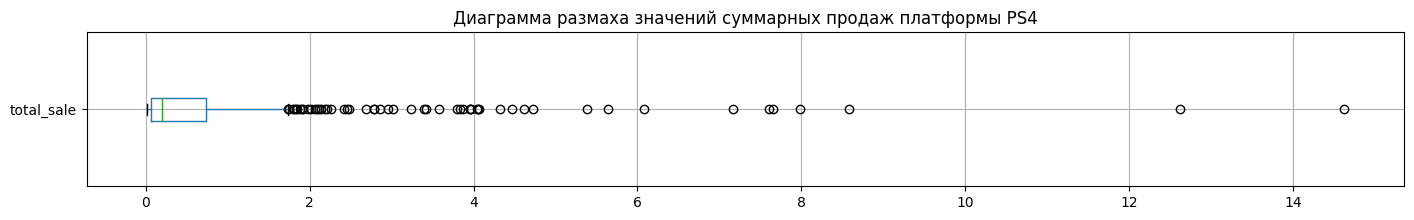

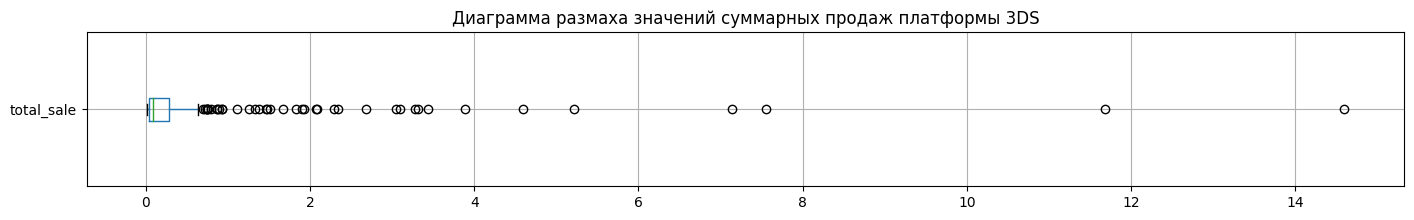

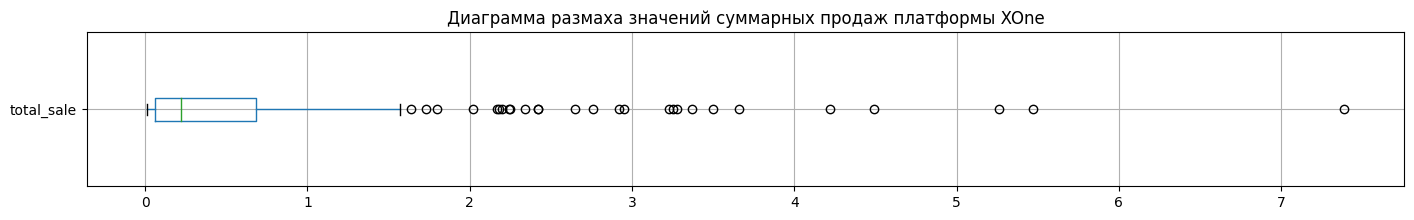

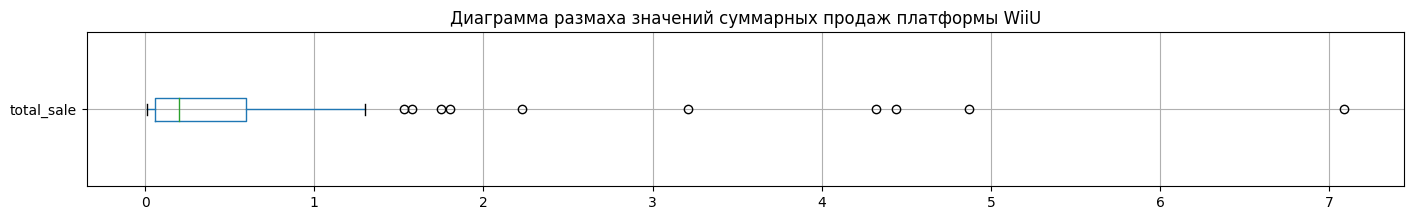

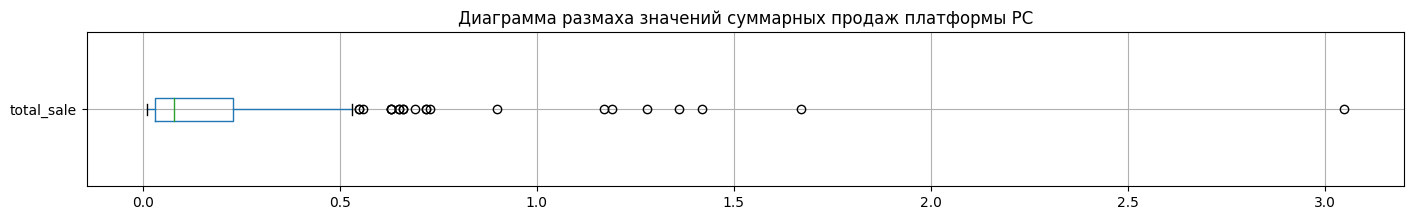

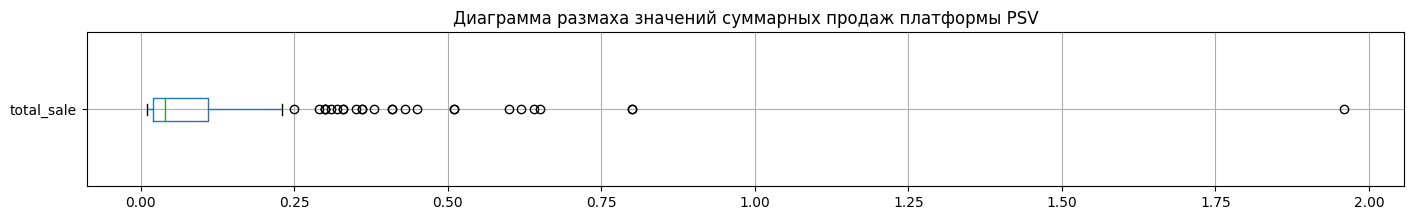

In [35]:
for i in table['platform'].unique():
    fig, ax = plt.subplots(figsize = (17,2))
    ax = table[table['platform'] == i].boxplot(column='total_sale', vert = False, ax =ax)
    ax.set_title(f'Диаграмма размаха значений суммарных продаж платформы {i}')

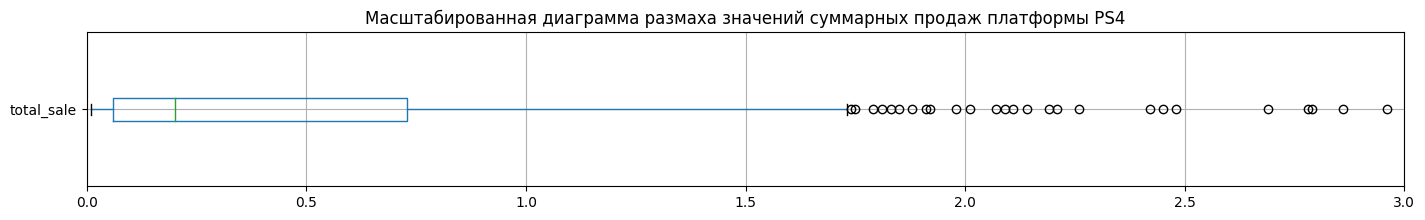

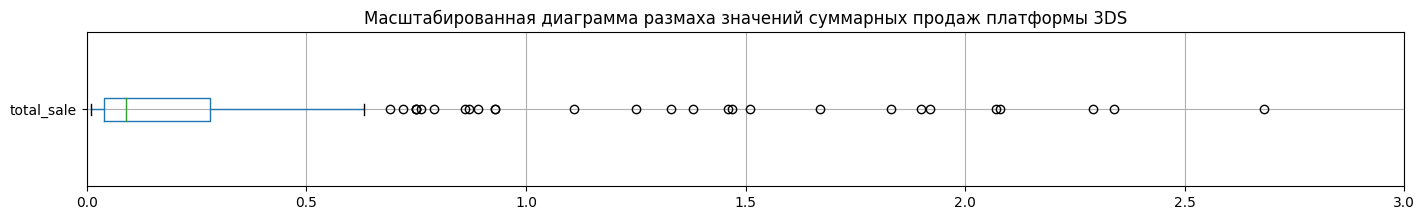

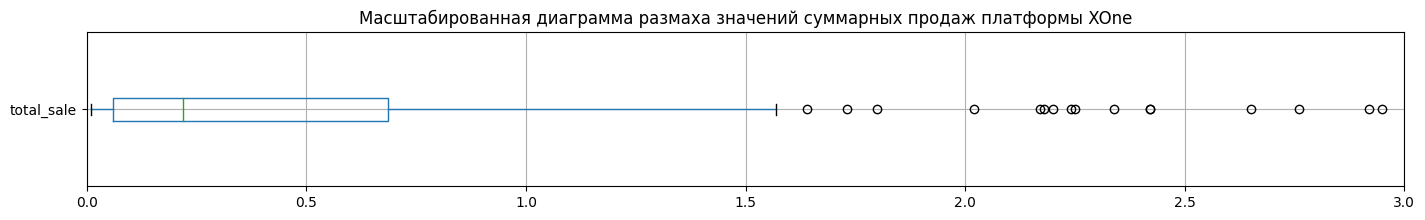

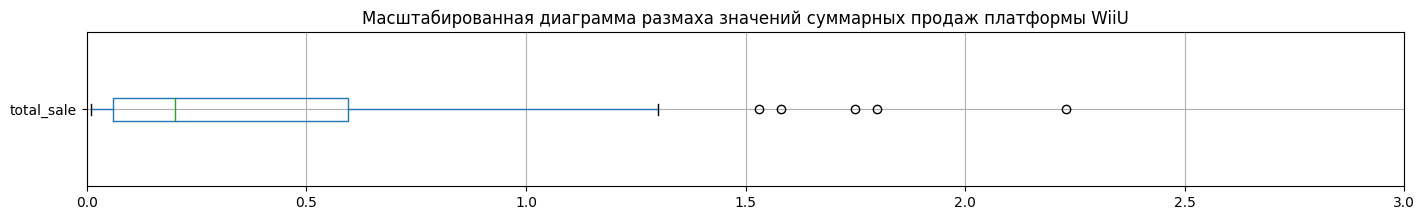

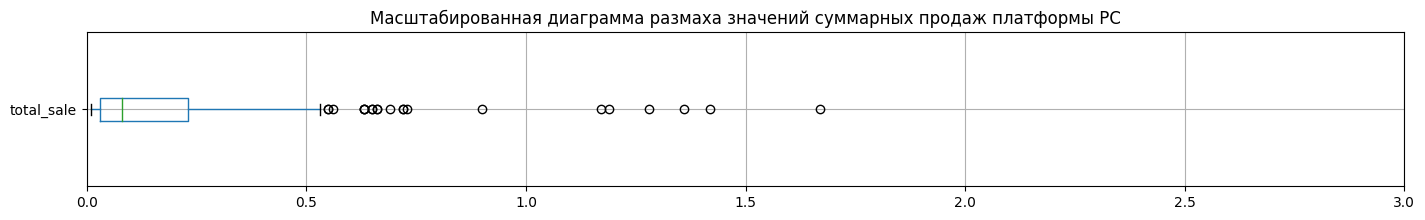

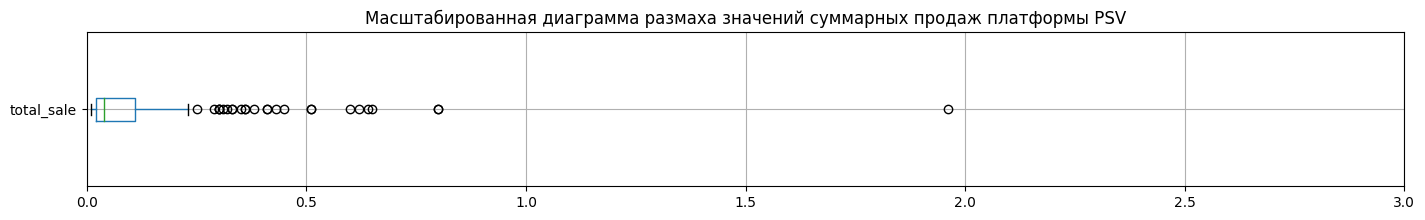

In [36]:
for i in table['platform'].unique():
    fig, ax = plt.subplots(figsize = (17,2))
    ax = table[table['platform'] == i].boxplot(column='total_sale', vert = False, ax =ax)
    ax.set_title(f'Масштабированная диаграмма размаха значений суммарных продаж платформы {i}')
    ax.set_xlim(0,3);

Медиана суммарных продаж лежит около 200.000 копий практически для каждой платформы. Межквартальный размах у игр варьируется от 100.000 до 700.000 проданных копий. Шире других диаграмм получилась диаграмма платформы PS4. Уже всех - PSV.

### 3.6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Построим новую диаграмму популярности платформ.

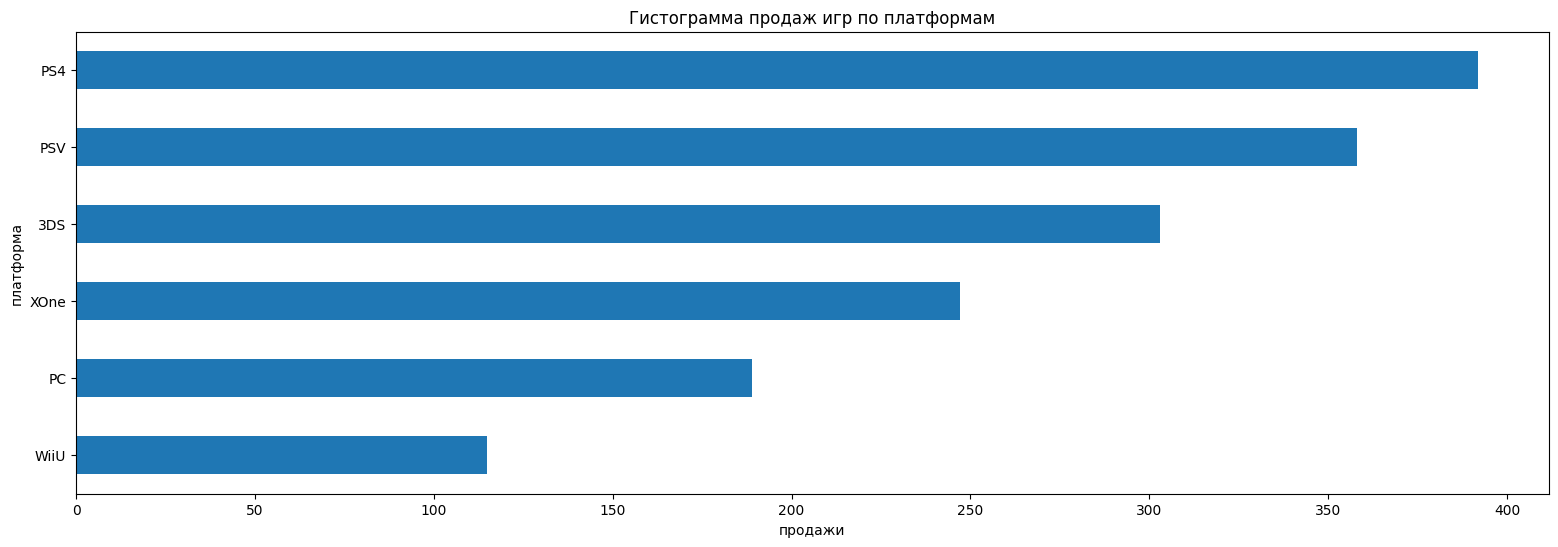

In [37]:
fig, ax = plt.subplots(figsize = (17,2))
ax = table.groupby('platform')['total_sale'].count().sort_values().plot(kind = 'barh', figsize = (19,6))
ax.set_title('Гистограмма продаж игр по платформам')
ax.set_ylabel('платформа')
ax.set_xlabel('продажи');

Наиболее популярная платформа по суммарным продажам за выбранные нами года - **PS4**.

<Figure size 500x300 with 0 Axes>

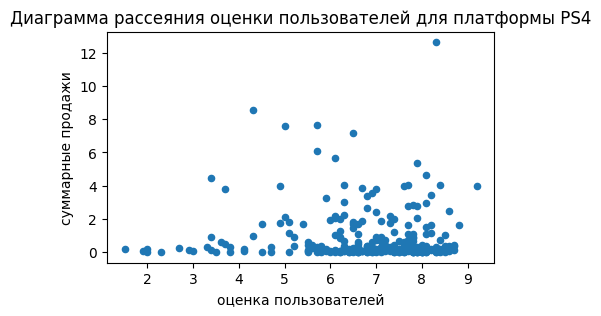

In [38]:
plt.figure(figsize=(5, 3))
ax = data[data['platform'] == 'PS4'].plot(kind='scatter', x='user_score', y='total_sale', figsize=(5, 3))
ax.set_title('Диаграмма рассеяния оценки пользователей для платформы PS4')
ax.set_ylabel('суммарные продажи')
ax.set_xlabel('оценка пользователей');

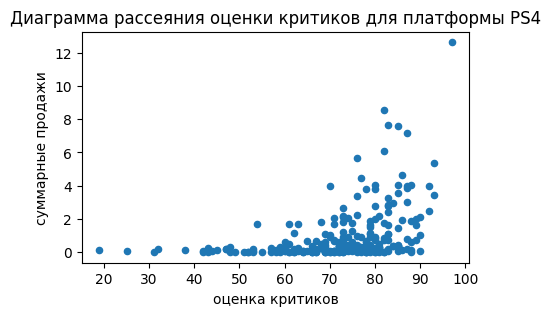

In [39]:
ax = data[data['platform'] == 'PS4'].plot(kind='scatter', x='critic_score', y='total_sale', figsize=(5, 3))
ax.set_title('Диаграмма рассеяния оценки критиков для платформы PS4')
ax.set_ylabel('суммарные продажи')
ax.set_xlabel('оценка критиков');

Оценки критиков и оценки пользователей описывают примерно одинаковое рассеяние. На обоих графиках присутствуют сильно выбивающиеся значения с высокой оценкой и большими продажами. Как пользователи, так и критики ставят различные оценки и чтобы оценить зависимость цены от них "приблизим" наши графики, убрав сильно выбивающиеся значения, чтобы разглядеть закономерность.

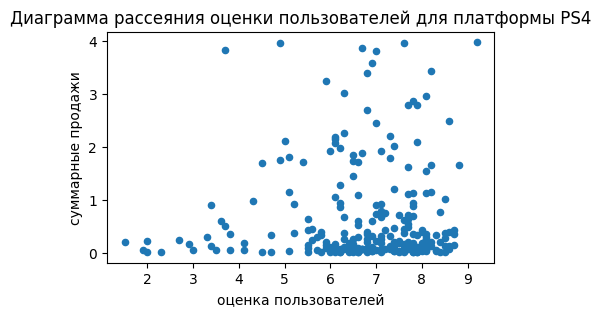

In [40]:
data_user = data.query('total_sale < 4')
ax = data_user[data_user['platform'] == 'PS4'].plot(kind='scatter', x='user_score', y='total_sale', figsize=(5, 3))
ax.set_title('Диаграмма рассеяния оценки пользователей для платформы PS4')
ax.set_ylabel('суммарные продажи')
ax.set_xlabel('оценка пользователей');

In [41]:
data_PS4 = data.query('platform == "PS4"')
round(data_PS4['total_sale'].corr(data_PS4['user_score']), 2)

-0.03

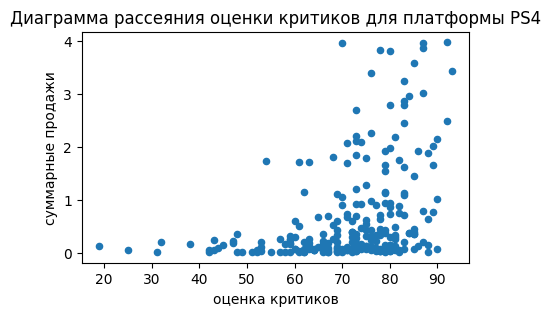

In [42]:
data_critic = data.query('total_sale < 4')
ax = data_critic[data_critic['platform'] == 'PS4'].plot(kind='scatter', x='critic_score', y='total_sale', figsize=(5, 3))
ax.set_title('Диаграмма рассеяния оценки критиков для платформы PS4')
ax.set_ylabel('суммарные продажи')
ax.set_xlabel('оценка критиков');

In [43]:
round(data_PS4['total_sale'].corr(data_PS4['critic_score']), 2)

0.41

По коэффициентам корреляции можно сказать, что продажи зависят от оценки критиков. Коэффициент корреляции показал слабую статистическую зависимость. От оценки пользователей продажи не зависят вовсе.

Посмотрим на графики и коэффициенты корреляции для других игр.

Коэффициент корреляции для PSV: 0.0009424723319108626
Коэффициент корреляции для 3DS: 0.24150411773563016
Коэффициент корреляции для XOne: -0.06892505328279412
Коэффициент корреляции для WiiU: 0.4193304819266187
Коэффициент корреляции для PC: -0.09384186952476739


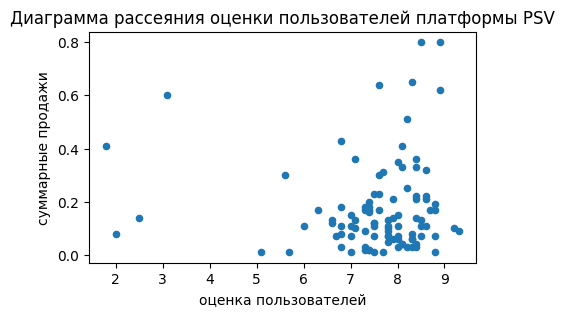

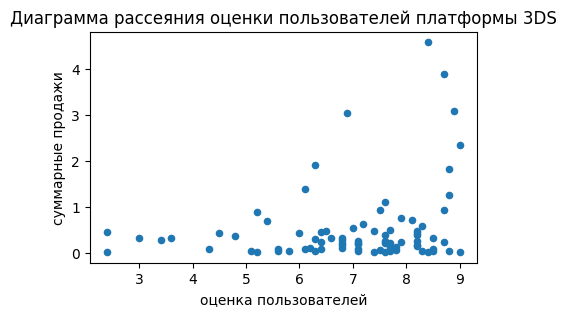

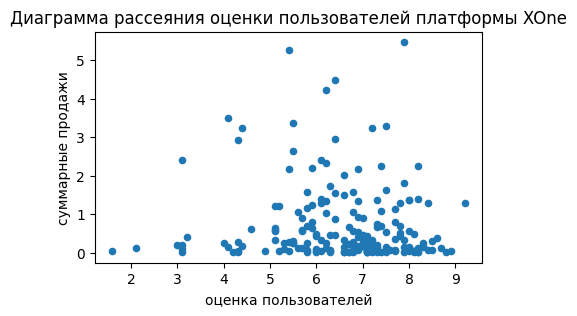

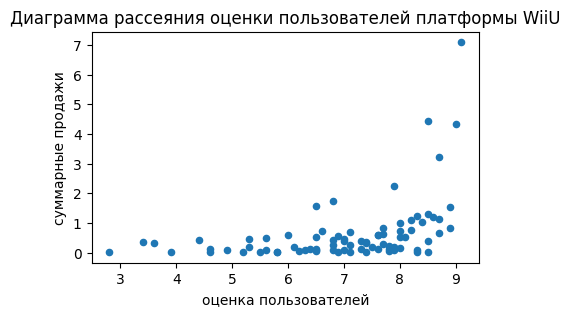

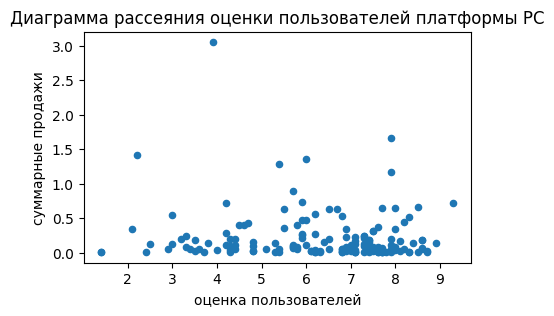

In [44]:
platforms = ['PSV', '3DS', 'XOne', 'WiiU', 'PC']
for platform in platforms:
    ax = data[data['platform'] == platform].plot(kind='scatter', x='user_score', y='total_sale', figsize=(5, 3))
    ax.set_title(f'Диаграмма рассеяния оценки пользователей платформы {platform}')
    ax.set_ylabel('суммарные продажи')
    ax.set_xlabel('оценка пользователей');
    data_platform = data[data['platform'] == platform]
    print(f'Коэффициент корреляции для {platform}:', data_platform['total_sale'].corr(data_platform['user_score']))

Коэффициент корреляции для PSV: 0.25474235030686565
Коэффициент корреляции для 3DS: 0.35705661422881035
Коэффициент корреляции для XOne: 0.41699832800840175
Коэффициент корреляции для WiiU: 0.3764149065423912
Коэффициент корреляции для PC: 0.19603028294369382


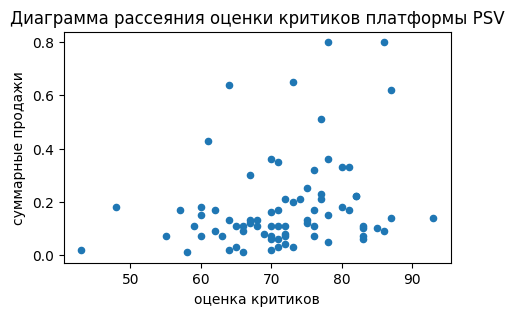

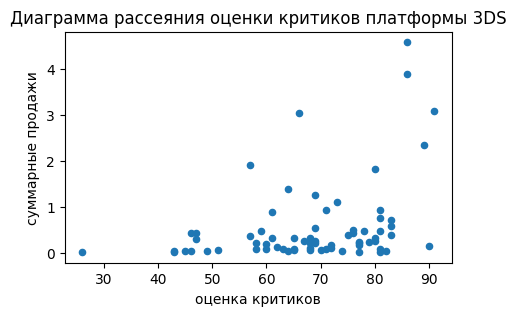

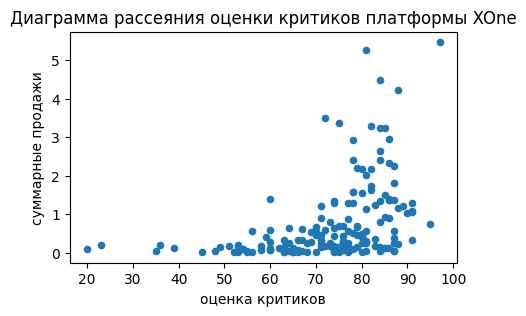

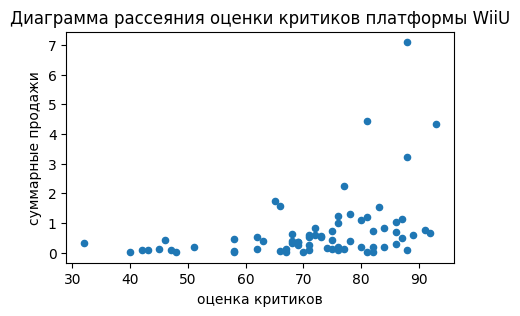

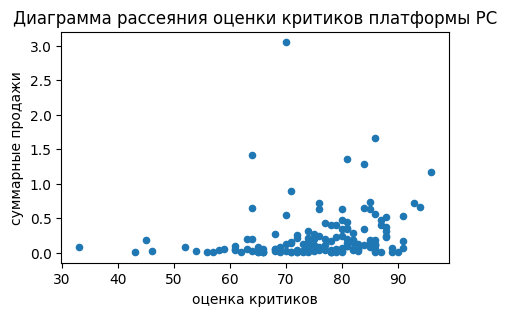

In [45]:
platforms = ['PSV', '3DS', 'XOne', 'WiiU', 'PC']
for platform in platforms:
    ax = data[data['platform'] == platform].plot(kind='scatter', x='critic_score', y='total_sale', figsize=(5, 3))
    ax.set_title(f'Диаграмма рассеяния оценки критиков платформы {platform}')
    ax.set_ylabel('суммарные продажи')
    ax.set_xlabel('оценка критиков')
    data_platform = data[data['platform'] == platform]
    print(f'Коэффициент корреляции для {platform}:', data_platform['total_sale'].corr(data_platform['critic_score']))

По коэффициентам корреляции так же можно сказать что продажи гораздо больше зависят от оценки критиков, чем от оценки пользователей. Для некоторых платформ вовсе отсутствует зависимость между продажами и пользовательскими оценками. На графиках оценки пользователей чаще можно встретить выбивающиеся значения высоких продаж и низкого рейтинга. 

### 3.7. Посмотрим на общее распределение игр по жанрам.

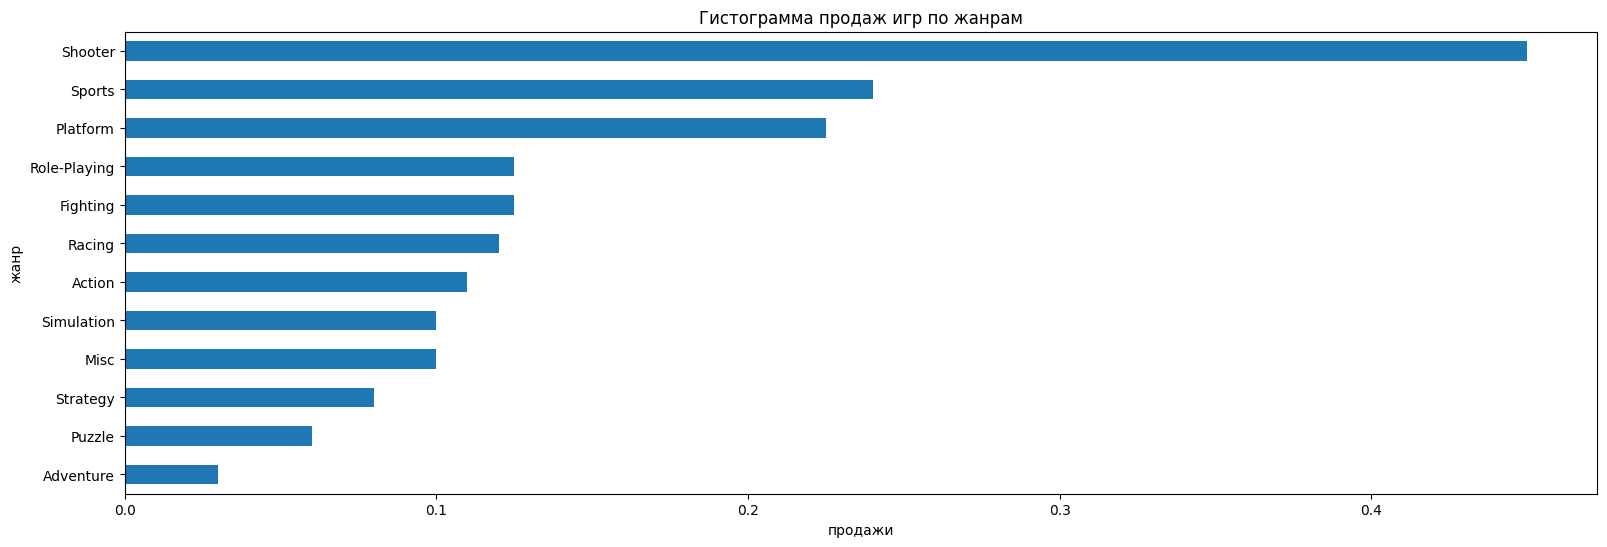

In [46]:
ax = data.groupby('genre')['total_sale'].median().sort_values().plot(kind = 'barh', figsize = (19,6))
ax.set_title('Гистограмма продаж игр по жанрам')
ax.set_ylabel('жанр')
ax.set_xlabel('продажи');

Самый популярный жанр по продажам это шутер(shooter). Далее идут спорт (sports), platform, ролевые игры (role-playing), борьба (fighting) и гонки (racing). Остальные менее популярные.

## 4. Составим портрет пользователя для каждого региона.<a id='section_id_4'></a>

### 4.1. Портрет пользователя Северной Америки.

* Определим самые популярные платформы. Создадим таблицу - срез, которая будет в себя включать названия платформ, жанры, продажи в Северной Америке и рейтинг ESRB.

In [47]:
data_na = pd.DataFrame(data = data.loc[:, ['platform', 'genre', 'na_sales', 'rating']], columns = ['platform', 'genre', 'na_sales', 'rating'])
data_na.head()

,platform,genre,na_sales,rating
16,PS3,Action,7.02,M
23,X360,Action,9.66,M
31,PS4,Shooter,6.03,Unknown
33,3DS,Role-Playing,5.28,Unknown
42,PS4,Action,3.96,M


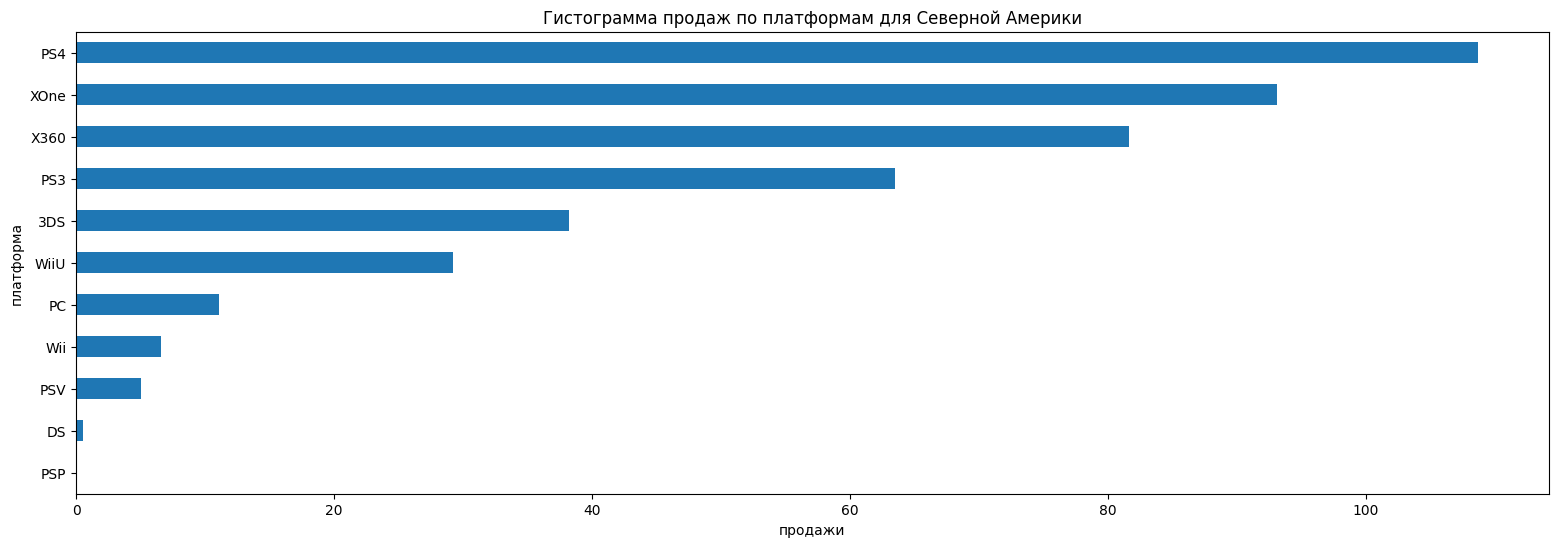

In [48]:
ax = data_na.groupby('platform')['na_sales'].sum().sort_values().plot(kind = 'barh', figsize = (19,6))
ax.set_title('Гистограмма продаж по платформам для Северной Америки')
ax.set_ylabel('платформа')
ax.set_xlabel('продажи');

Для Северной Америки самыми популярными платформами являются **PS4**, **XOne**, **X360**, **PS3** и **3DS**. Посмотрим какая доля продаж приходится на каждую из них. Построим круговую диаграмму по платформам, предварительно объеденив непопулярные платформу в категорию 'другие'.

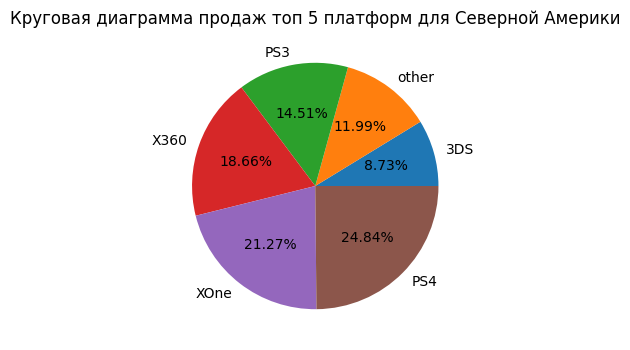

In [49]:
platforms = ['Wii', 'WiiU', 'PC', 'DS', 'PSV', 'PSP', 'PS2']
for platform in platforms:
    data_na['platform'] = data_na['platform'].replace(platform, 'other')
       
ax = data_na.groupby('platform')['na_sales'].sum().sort_values().plot(kind = 'pie', autopct='%1.2f%%', figsize=(5, 4))
ax.set_title('Круговая диаграмма продаж топ 5 платформ для Северной Америки')
ax.set_ylabel('')
ax.set_xlabel('');

Самая большая доля продаж в Северной Америке приходится на платформы **PS4** и **XOne**. Вместе они занимают практически половину всех продаж в данном регионе. Меньше всего продаж приходится на 3DS, ~9%. На платформы **X360** и **PS3** приходится ~ 18 и 14% соответственно.

* Определим самые популярные жанры.

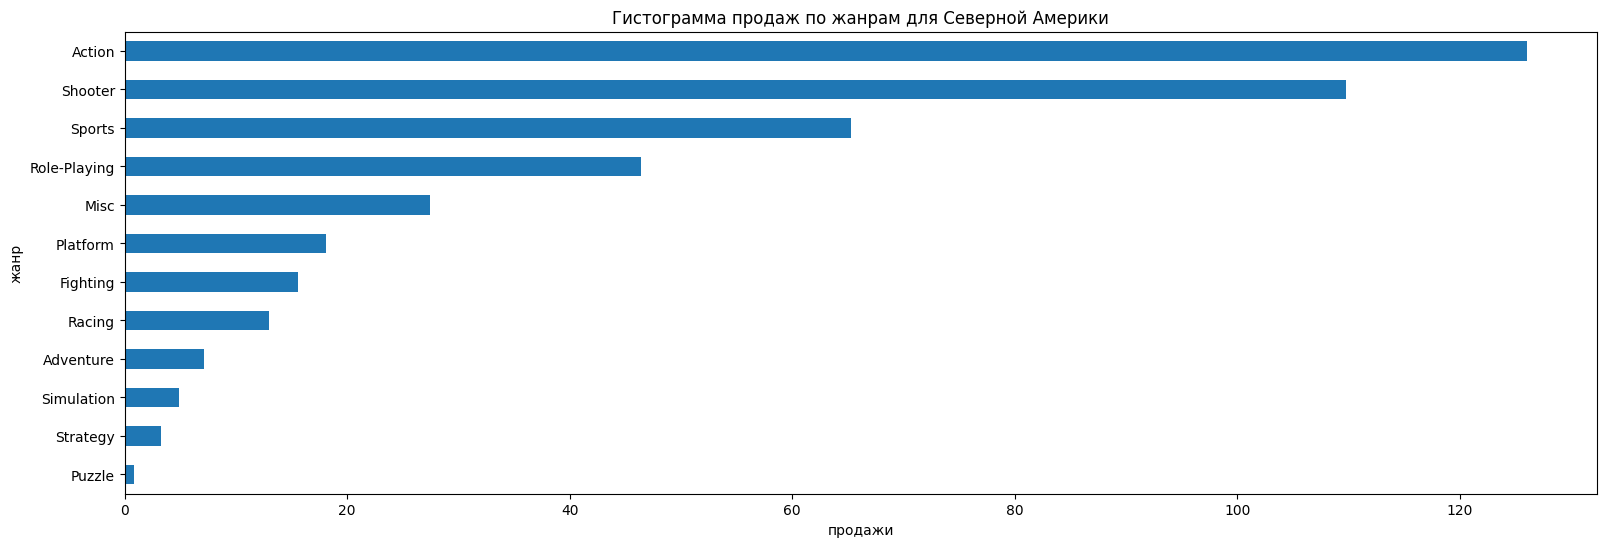

In [50]:
ax = data_na.groupby('genre')['na_sales'].sum().sort_values().plot(kind = 'barh', figsize = (19,6))
ax.set_title('Гистограмма продаж по жанрам для Северной Америки')
ax.set_ylabel('жанр')
ax.set_xlabel('продажи');

В Северной Америке самыми популярными жанрами оказались: экшен (action), шутер (shooter), спорт (sports), ролевые игры (role-playing), и разное (misc). Остальные жанры сильно проигрывают по популярности.

* Определим, влияет ли рейтинг ESRB на продажи.

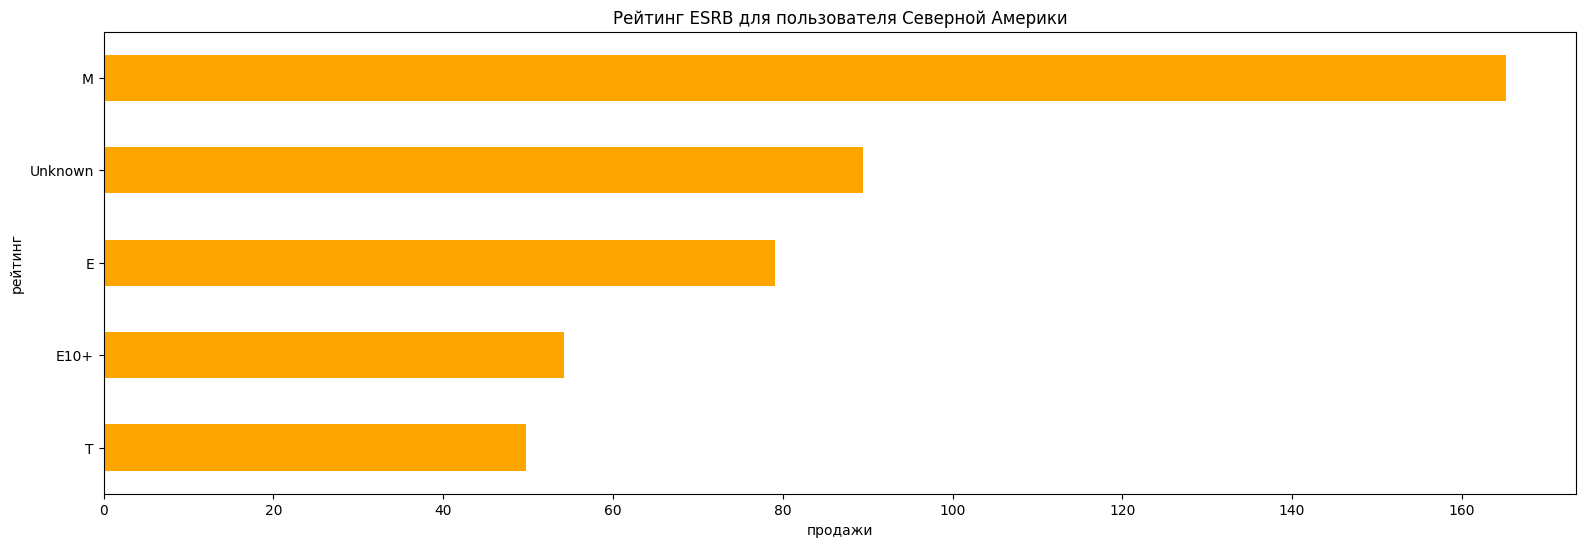

In [51]:
ax = data_na.groupby('rating')['na_sales'].sum().sort_values().plot(kind = 'barh', figsize = (19,6), color='orange')
ax.set_title('Рейтинг ESRB для пользователя Северной Америки')
ax.set_ylabel('рейтинг')
ax.set_xlabel('продажи');

Рейтинг ESRB описывает возрастную категорию игр:
- М (Mature) - для взрослых,
- E (Everyone) - для всех,
- E10+ (Everyone 10 and older) - для всех от 10 лет и старше,
- T (Teen) - для подростков,
- EC (Early childhood) - для детей младшего возраста,
- RP (Rating Pending) - ожидается присвоение рейтинга,
- Unknown - неопределено (заполненное нами значение)

Категоризация по ESRB достаточно сильно влияет на продажи игр. Игры с рейтингом М сильно лидируют по продажам, игры с рейтингом Unknown уступают практически в 2 раза, категории E, E10+ и T имеют самый маленькие продажи. 

Таким образом пользователь из Северной Америки чаще всего предпочитает платформы **PS4** и **XOne**. Экшн, шутер и спорт самые предпочтительные для него жанры. Рейтинг ESRB  влияет на продажи. Больше всего продаж в категории М.

### 4.2. Портрет пользователя Европы.

Определим самые популярные платформы. Создадим таблицу - срез, которая будет в себя включать названия платформ, жанры, продажи в Европе и рейтинг ESRB.

In [52]:
data_eu = pd.DataFrame(data = data.loc[:, ['platform', 'genre', 'eu_sales', 'rating']], columns = ['platform', 'genre', 'eu_sales', 'rating'])
data_eu.head()

,platform,genre,eu_sales,rating
16,PS3,Action,9.09,M
23,X360,Action,5.14,M
31,PS4,Shooter,5.86,Unknown
33,3DS,Role-Playing,4.19,Unknown
42,PS4,Action,6.31,M


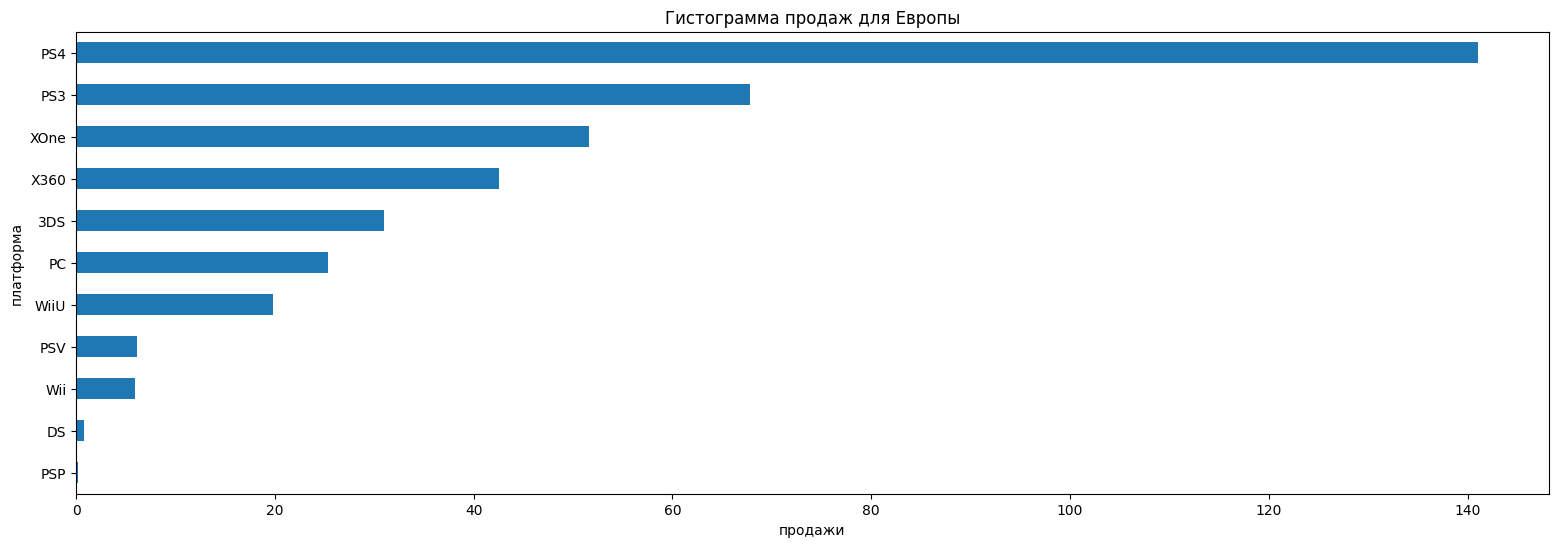

In [53]:
ax = data_eu.groupby('platform')['eu_sales'].sum().sort_values().plot(kind = 'barh', figsize = (19,6))
ax.set_title('Гистограмма продаж для Европы')
ax.set_ylabel('платформа')
ax.set_xlabel('продажи');

В Европе самыми популярными по продажам оказались платформы **PS4**, **PS3**, **XOne**, **X360**, **3DS**. Аналогично пункту 4.1. объеденим оставшиеся платформы в 'other' и построим круговую диаграмму для платформ по продажам в Европе.

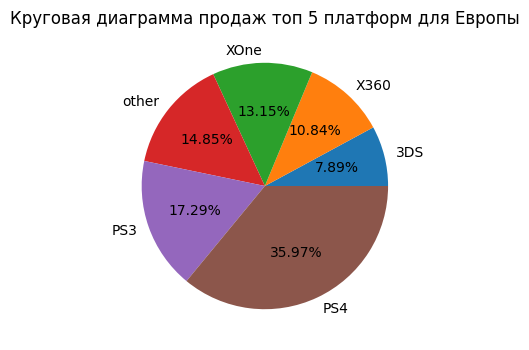

In [54]:
platforms = ['PC', 'Wii', 'WiiU', 'DS', 'PSV', 'PSP']
for platform in platforms:
    data_eu['platform'] = data_na['platform'].replace(platform, 'other')
       
ax = data_eu.groupby('platform')['eu_sales'].sum().sort_values().plot(kind = 'pie', autopct='%1.2f%%', figsize=(5, 4))
ax.set_title('Круговая диаграмма продаж топ 5 платформ для Европы')
ax.set_ylabel('')
ax.set_xlabel('');

Самая большая доля продаж приходится на платформы PS4 и PS3 ~36 и 17% соответственно. На платформы XOne, X360 и 3DS приходится меньшая доля продаж, ~13, 10 и 8% соответственно.

* Определим самые популярные жанры.

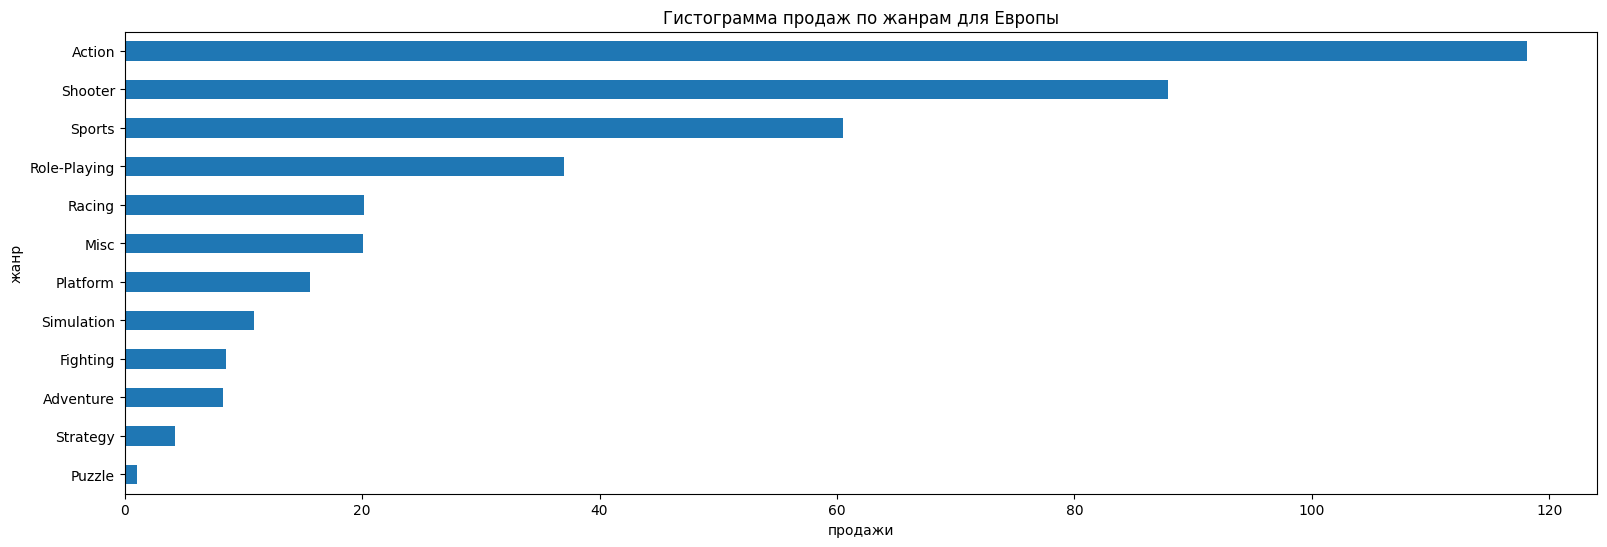

In [55]:
ax = data_eu.groupby('genre')['eu_sales'].sum().sort_values().plot(kind = 'barh', figsize = (19,6))
ax.set_title('Гистограмма продаж по жанрам для Европы')
ax.set_ylabel('жанр')
ax.set_xlabel('продажи');

Самыми популярными жанрами в Европе являются экшен (action), шутер (shooter), спорт (sport), ролевые игры (pole-playing) и гонки (racing).

* Определим, влияет ли рейтинг ESRB на продажи.

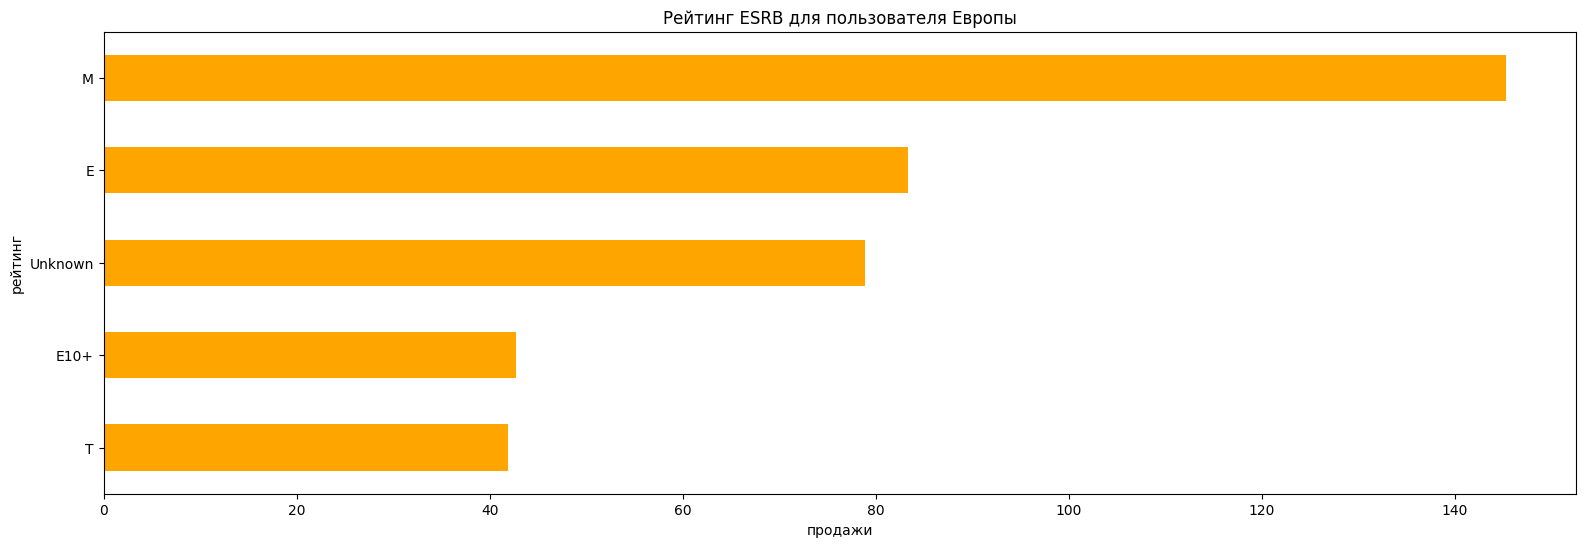

In [56]:
ax = data_eu.groupby('rating')['eu_sales'].sum().sort_values().plot(kind = 'barh', figsize = (19,6), color='orange')
ax.set_title('Рейтинг ESRB для пользователя Европы')
ax.set_ylabel('рейтинг')
ax.set_xlabel('продажи');

График рейтинка похож на график для пользователя Северной Америки. Так же рейтинг М (для взрослых) является самым продаваемым. Категория Е (для всех) немного менее популярна, чем в Северной Америке. Такое же большое значение пока ещё неопределённого рейтинга. Категории T и E10+ для детей менее популярны, чем для предыдущего пользователя. Оказывается, что игр с рейтингом RT (ожидание присвоения рейтинга) и EC (для детей младщего возраста) практически нет (у каждого по одной позиции в датафрейме).

Таким образом, европейский пользователь довольно сильно похож на вышеописанного пользователя Северной Америки. Он так же предпочитает жанры экшн, шутер и спорт. Его предпочтение гатегории М рейтинга ESRB согласуется с предпочтением американца. Он так же, как американец предпочтёт платформы **X360** и **PS3**, однако платформа **PS4** его так же довольно заинтересует.

### 4.3. Портрет пользователя Японии.

* Определим самые популярные платформы. Создадим таблицу - срез, которая будет в себя включать названия платформ, жанры, продажи в Японии и рейтинг ESRB.

In [57]:
data_jp = pd.DataFrame(data = data.loc[:, ['platform', 'genre', 'jp_sales', 'rating']], 
                       columns = ['platform', 'genre', 'jp_sales', 'rating'])
data_jp.head()

,platform,genre,jp_sales,rating
16,PS3,Action,0.98,M
23,X360,Action,0.06,M
31,PS4,Shooter,0.36,Unknown
33,3DS,Role-Playing,4.35,Unknown
42,PS4,Action,0.38,M


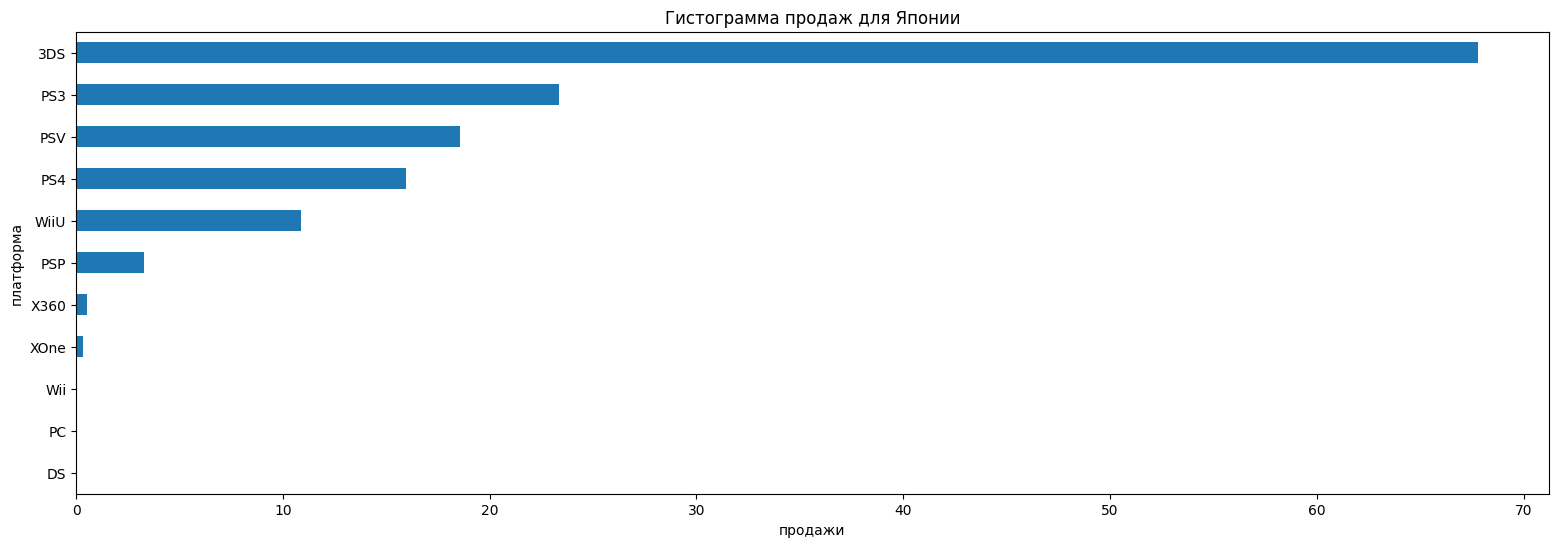

In [58]:
ax = data_jp.groupby('platform')['jp_sales'].sum().sort_values().plot(kind = 'barh', figsize = (19,6))
ax.set_title('Гистограмма продаж для Японии')
ax.set_ylabel('платформа')
ax.set_xlabel('продажи');

Платформа **3DS** в Японии имеет огромную популярность. Её продажи оцениваются порядком 70 тыс. проданных копий. Платформа PS3 имеет практически в 2,5 раза более низкие продажи. Далее в рейтинге следуют платформы **PSV**, **PS4** и **WiiU**, но они продаются значительно меньше лидеров.Объеденим оставшиеся платформы в 'other' и построим круговую диаграмму для платформ по продажам в Японии.

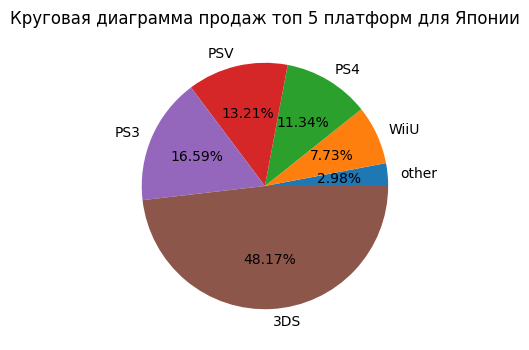

In [59]:
platforms = ['Wii', 'DS', 'X360', 'XOne', 'PC', 'PSP']
for platform in platforms:
    data_jp['platform'] = data_jp['platform'].replace(platform, 'other')
       
ax = data_jp.groupby('platform')['jp_sales'].sum().sort_values().plot(kind = 'pie', autopct='%1.2f%%', figsize=(5, 4))
ax.set_title('Круговая диаграмма продаж топ 5 платформ для Японии')
ax.set_ylabel('')
ax.set_xlabel('');

На диаграмме видно какую большую популярность имеет платформа **3DS**. Она занимает около 48% всех продаж. Платформа **PS3** занимает практически в 3 раза меньшую долю, ~17% всех продаж. Остальные платформы **PSV**, **PS4** и **WiiU** занимают ~13, 11 и 8% соответственно.

* Определим самые популярные жанры.

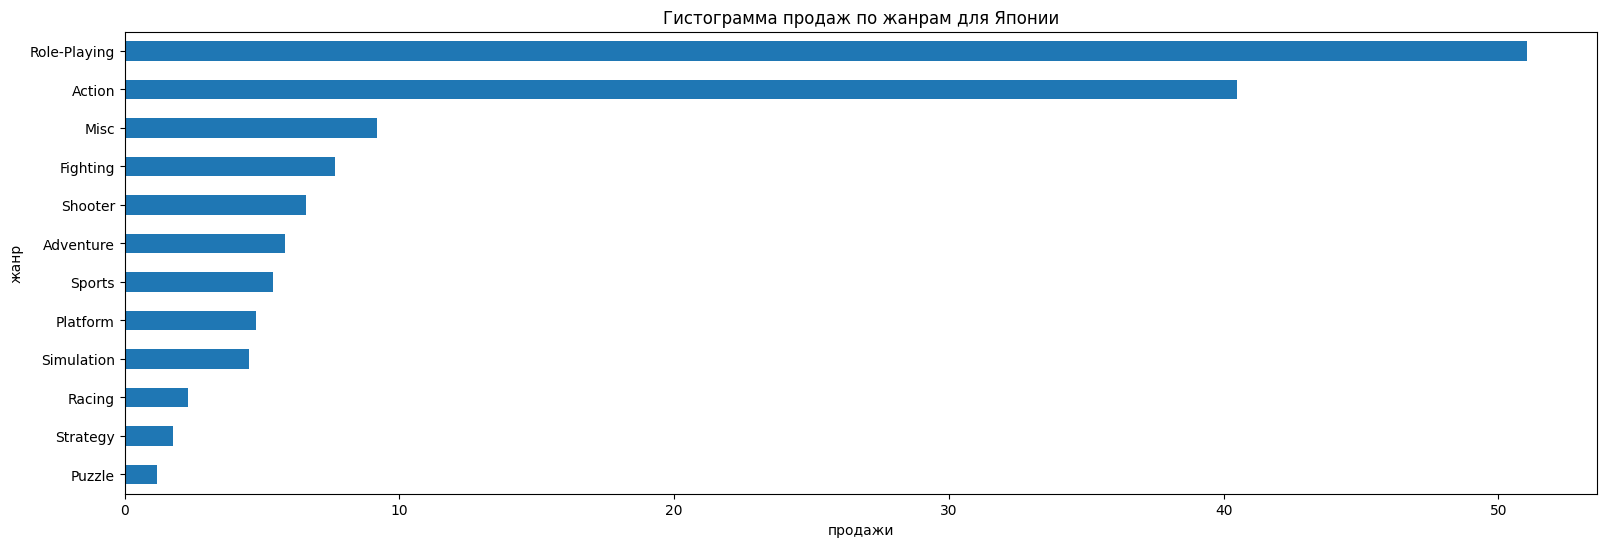

In [60]:
ax = data_jp.groupby('genre')['jp_sales'].sum().sort_values().plot(kind = 'barh', figsize = (19,6))
ax.set_title('Гистограмма продаж по жанрам для Японии')
ax.set_ylabel('жанр')
ax.set_xlabel('продажи');

Пользователь Японии сильно отличается предпочтением к жанрам ролевых игра (pole-playing) и экшен (action). Остальные жанры имеют гораздо более меньшие продажи, практически в 5 раз. Тем не менее далее по рейтингу жанров идут: разное (misc), файтинг/борьба (fighting) и шутер (shooter).

* Определим, влияет ли рейтинг ESRB на продажи.

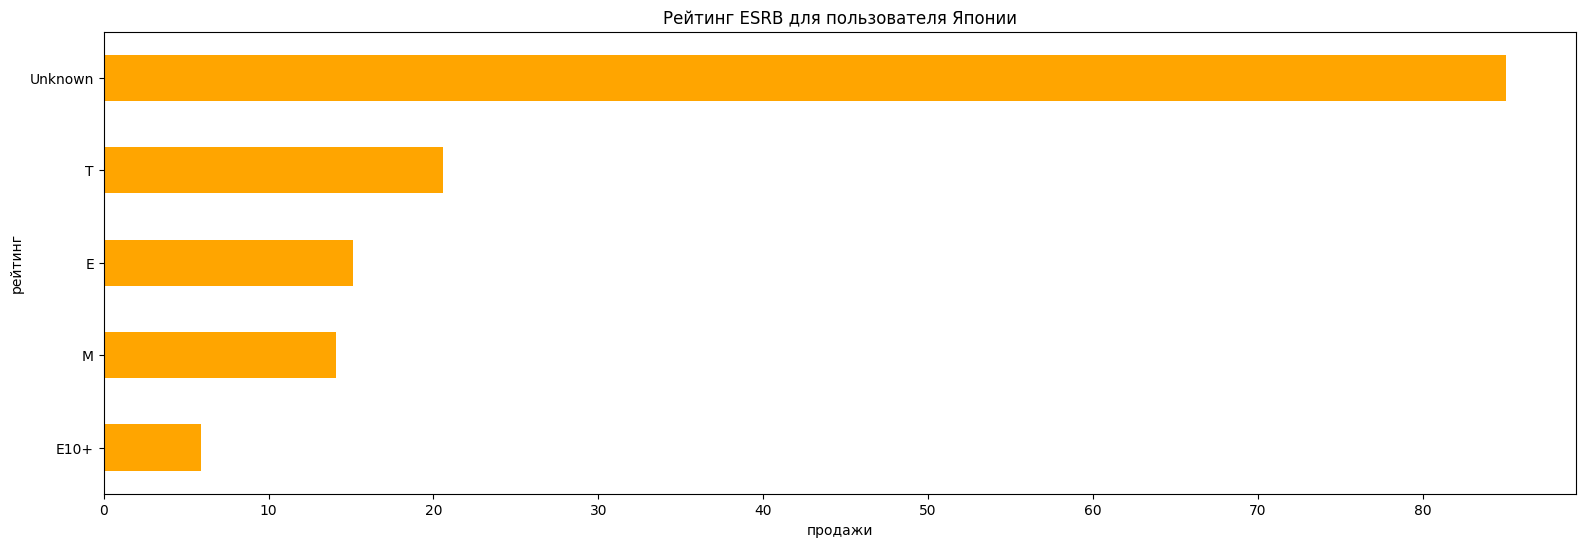

In [61]:
ax = data_jp.groupby('rating')['jp_sales'].sum().sort_values().plot(kind = 'barh', figsize = (19,6), color='orange')
ax.set_title('Рейтинг ESRB для пользователя Японии')
ax.set_ylabel('рейтинг')
ax.set_xlabel('продажи');

Очень большое количество продаж в Японии призходится на неопределённый рейтинг. Категории T (для подростков) и E (для всех) имеют в 4 раза более меньшие продажи. По сравнению с расмотренными предыдущими пользователями Северной Америки и Европы, где рейтинг М (для взрослых) наиболее популярен, в Японии данная категория не бользуется большим спросом. Рейтинг Е10+ (для всех от 10 и старше) имеет совсем небольшие продажи по сравнению с остальными.

Итого, пользователь Японии сильно отличается от описанных выше. Он даёт сильно предпочтение платaтформе 3DS. PS3 имеет продажи в 3 раза меньше. Сильнее остальных он выделяет всего два жанра: ролевые игры и экшн. Огромное количество продаж неопределённого рейтинга приходится как раз на потенциального пользователя из Японии.

## 5. Проверка гипотез.<a id='section_id_5'></a>

### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза H<sub>0</sub>: Средние пользовательские рейтинги платформ Xbox One и PC равны.<a id='section_id_5_1'></a>

Гипотеза H<sub>1</sub>: Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [62]:
data_hypothesis = data.dropna(subset=['user_score'])
data_XOne = data_hypothesis.loc[data['platform'] == 'XOne']['user_score']
data_PC = data_hypothesis.loc[data['platform'] == 'PC']['user_score']
results = st.ttest_ind(
    data_XOne, 
    data_PC, equal_var = False)

alpha = 0.01

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Наш эксперимент говорит нам о том, что наши данные не противоречат нулевой гипотезе.

### 5.2. Средние пользовательские рейтинги жанров Action и Sports разные.</br>

Гипотеза H<sub>0</sub>: Средние пользовательские рейтинги жанров Action и Sports равны.<a id='section_id_5_2'></a>

Гипотеза H<sub>1</sub>: Средние пользовательские рейтинги жанров Action и Sports различны.

In [63]:
data_Action = data_hypothesis.loc[data['genre'] == 'Action']['user_score']
data_Sports = data_hypothesis.loc[data['genre'] == 'Sports']['user_score']
results = st.ttest_ind(
    data_Action, 
    data_Sports, equal_var = False)

alpha = 0.01

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Наши данные показывают очень маловероятные результаты, поэтому они могут не противоречить альтернативной гипотезе H<sub>1</sub>.

## 6. Общий вывод.<a id='section_id_6'></a>

Нам был предоставлен датафрейм данных о продаже видеоигр в интернет-магазине «Стримчик» за период до 2016 года. Перед нами стояла задача запланировать кампанию на 2017-й год. 
В ходе исследовательского анализа были сделаны следующие выводы:

* Игровые платформы набирают свою популярность в течение 3-5 лет и теряют в течение примерно 5-ти лет. Жизненный цикл платформы оценивается как 8-10 лет, следовательно, актуальный период для прогноза на 2017 год считается промежуток 2013-2016 годы. 
* Платформы PS4, 3DS, XOne, PSV, WiiU и PC вероятнее всего смогут приносить доход в 2017 году. Медиана продаж - 200.000 проданных копий. Межквартальный размах - 100.000 - 700.000. Шире других получилась диаграмма PS4. Уже всех - PSV.
* Продажи игр сильнее зависят от оценок критиков, чем от оценок пользователей. 
* Самый популярный жанр во всём датафрейме шутер. За ним следуют: спорт, platform, ролевые игры, борьба и гонки. Остальные гораздо менее популярные среди пользователей.
* Портрет пользователя для Северной Америки. Данный пользователь чаще всего предпочитает платформы PS4 и XOne. Так же наиболее предпочтительные для него жанры оказались: экшен, шутер и спорт. Рейтинг ESRB безусловно влияет на продажи. Чаще всего северный американец предпочтёт категорию М (для взрослых).
* Европейский пользователь отдаёт свой выбор платформам X360 и PS3 и PS4. Выше остальных он ставит жанры экшен и шутер, как и американец. Так же как и вышеописанный пользователь европеец обеспечивает большие продажи категории М рейтинга ESRB.
* Потенциальный пользователь из Японии сильно отличается от описанных выше. Платформа 3DS имеет гораздо большую популярность, чем остальные. Платформа PS3 имеет продажи в 3 раза меньше. Пользователь из Японии гораздо чаще всего предпочитает всего 2 жанра: ролевые игры и экшен. Так же оказалось, что значения, которые мы заполнили как неопределенный рейтинг в рейтинге ESRB, стали наиболее продаваемыми для пользователя Японии. 

Результат проверни статистических гипотез:
* Наши данные не противоречат гипотезе о том, что средние пользовательские рейтинги платформ Xbox One и PC равны;
* Наши данные не противоречат гипотезе о том, что средние пользовательские рейтинги жанров Action и Sports различны.